# Deteccion de Anomalias:

El problema de detección de anomalías es una tarea de aprendizaje no supervisado. En este tipo de problemas, buscamos identificar datos que son "anómalos" o significativamente diferentes del resto de los datos. No es ni una tarea de clasificación ni una tarea de regresión en el sentido tradicional, porque no estamos intentando predecir una etiqueta o un valor continuo. En lugar de eso, estamos intentando identificar qué datos son "diferentes" de manera significativa.

Por ejemplo, en un conjunto de datos sobre transacciones de tarjetas de crédito, una "anomalía" podría ser una transacción que es muy diferente a las demás en términos de monto, ubicación, hora del día, etc. Estas anomalías podrían indicar actividad fraudulenta.

In [1]:
# Importamos las librerias necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargamos los datos

url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"

df = pd.read_csv(url)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Este DataFrame tiene las siguientes columnas:

Time: El número de segundos transcurridos entre esta transacción y la primera transacción en el conjunto de datos.
V1, V2, ..., V28: Componentes principales obtenidos con PCA. Los detalles no se pueden proporcionar debido a problemas de confidencialidad.
Amount: Importe de la transacción.
Class: 1 en caso de fraude y 0 en caso contrario.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

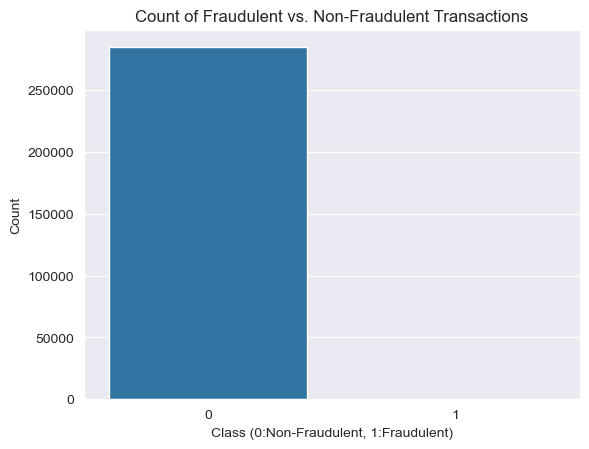

In [5]:
import seaborn as sns

class_counts = df['Class'].value_counts()

sns.barplot(x=class_counts.index, y=class_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Este código crea un gráfico de barras que muestra el número de transacciones fraudulentas y no fraudulentas en nuestro conjunto de datos.

Vamos a crear algunos gráficos de densidad. Un gráfico de densidad muestra la distribución de un conjunto de puntos de datos. En este caso, crearemos gráficos de densidad para algunas de las características en nuestros datos y veremos cómo estas distribuciones difieren para transacciones fraudulentas y no fraudulentas.

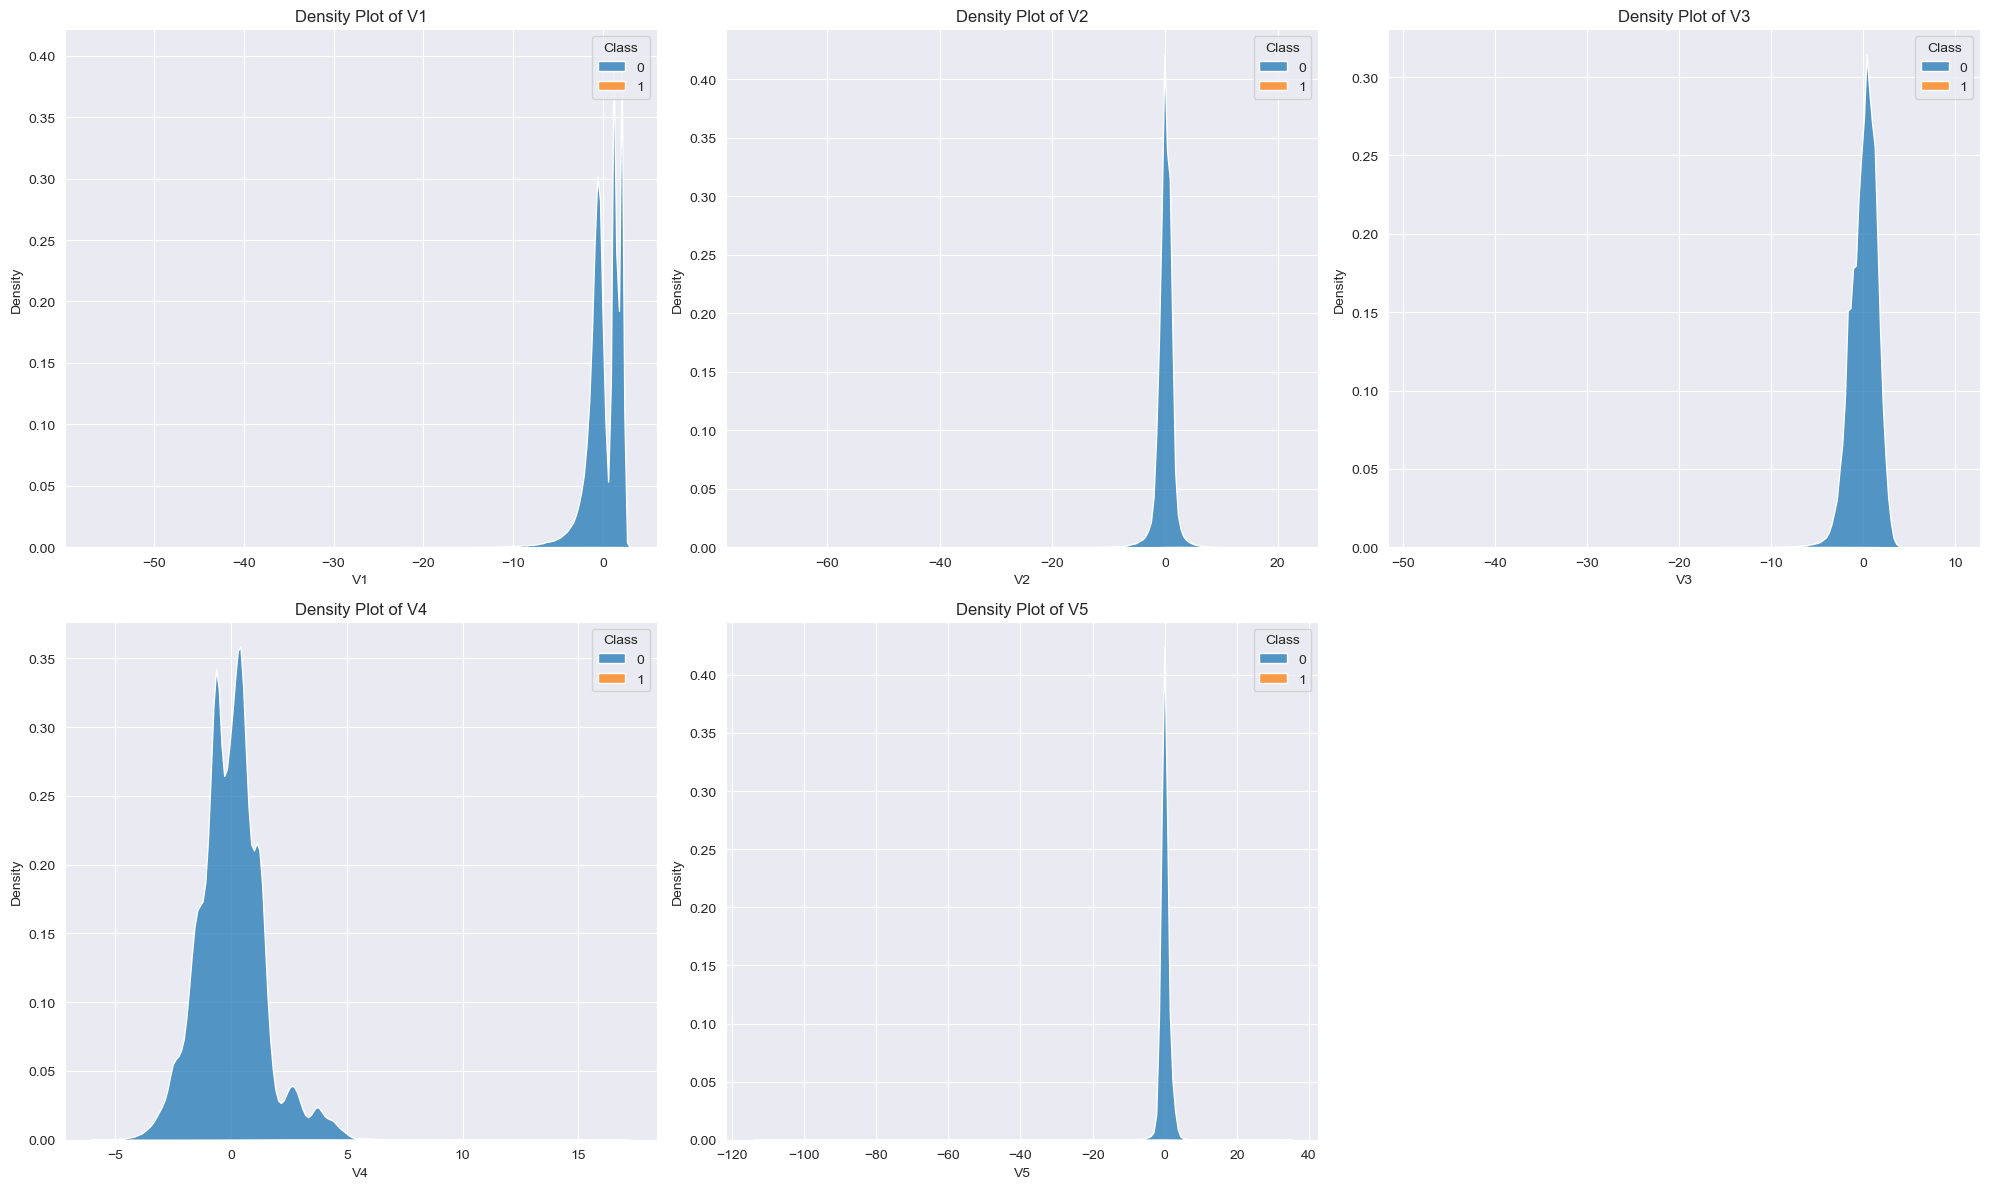

In [6]:
# Lista de algunas de las características
features = ['V1', 'V2', 'V3', 'V4', 'V5']

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

# Flatten the array of axes
axs = axs.flatten()

# Eliminar el último subtrama vacío
fig.delaxes(axs[-1])

# Para cada característica
for i, feature in enumerate(features):
    # Crear un gráfico de densidad de esa característica
    sns.kdeplot(data=df, x=feature, hue='Class', multiple='stack', ax=axs[i])
    axs[i].set_title('Density Plot of {}'.format(feature))

# Mostrar la figura
plt.tight_layout()
plt.show()

Tenemos un conjunto de gráficos de densidad que muestran la distribución de algunas de las características de tus datos para transacciones fraudulentas y no fraudulentas. Observa estos gráficos y ve si puedes identificar cualquier diferencia notable en las distribuciones de las características para las transacciones fraudulentas frente a las no fraudulentas.

Ahora vamos a dividir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba. Es importante siempre evaluar el rendimiento del modelo en datos que no ha visto antes. De esta manera, podemos entender qué tan bien generaliza el modelo a nuevos datos, lo cual es esencial para la detección de fraude.

Para este paso, usaremos la función train_test_split() de sklearn para dividir nuestros datos. Normalmente, es común utilizar alrededor del 70-80% de los datos para el entrenamiento y el resto para la prueba.

In [7]:
from sklearn.model_selection import train_test_split

# Definir las características y la variable objetivo
X = df.drop(columns='Class')
y = df['Class']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento: ", X_train.shape)
print("Tamaño del conjunto de prueba: ", X_test.shape)

Tamaño del conjunto de entrenamiento:  (227845, 30)
Tamaño del conjunto de prueba:  (56962, 30)


In [8]:
# Creamos el modelo

from sklearn.ensemble import IsolationForest

model = IsolationForest(max_samples='auto', contamination='auto', random_state=42)

# Entrenamos el modelo

model.fit(X_train)

IsolationForest(random_state=42)

IsolationForest es un algoritmo de detección de anomalías basado en árboles. Aísla las observaciones al seleccionar aleatoriamente una característica y luego seleccionar aleatoriamente un valor de división entre los valores máximo y mínimo de la característica seleccionada.

La lógica argumenta que las anomalías son más fáciles de aislar, ya que sólo se necesitan unas pocas condiciones para separarlas de las observaciones normales. Si una observación se aísla en pocas divisiones, es más probable que sea una anomalía.

El parámetro max_samples controla el número de muestras que se deben extraer para entrenar a cada árbol de decisión base.

contamination controla el umbral para separar las anomalías de las observaciones normales.

random_state controla la generación de números aleatorios para la selección de características y divisiones en cada árbol.

In [9]:
# Hacer predicciones
pred = model.predict(X_test)

# Las anomalías se denotan como -1, así que podemos usar esto para separar las anomalías de los datos normales
mask = pred == -1 # máscara booleana

Después de este paso, tendrás un subconjunto de tus datos de prueba que el modelo ha identificado como anomalías. Esto puede ser útil para muchas aplicaciones, como la detección de fraude, la detección de fallas o el monitoreo de la salud de la máquina.

Es importante recordar que la detección de anomalías es una tarea no supervisada, lo que significa que no tenemos etiquetas para nuestros datos. Por lo tanto, es difícil medir el rendimiento de nuestro modelo de una manera cuantitativa. Sin embargo, podrías inspeccionar manualmente las anomalías detectadas y ver si se alinean con lo que esperas de los datos.

visualización comúnmente utilizada en detección de anomalías es el gráfico de dispersión. Si tus datos son de más de dos dimensiones, puedes usar una técnica de reducción de la dimensionalidad como PCA o t-SNE antes de hacer el gráfico de dispersión.

Asegúrate de tratar de manera diferente a las anomalías en la visualización (por ejemplo, diferente color o tamaño) para que sean fácilmente distinguibles.

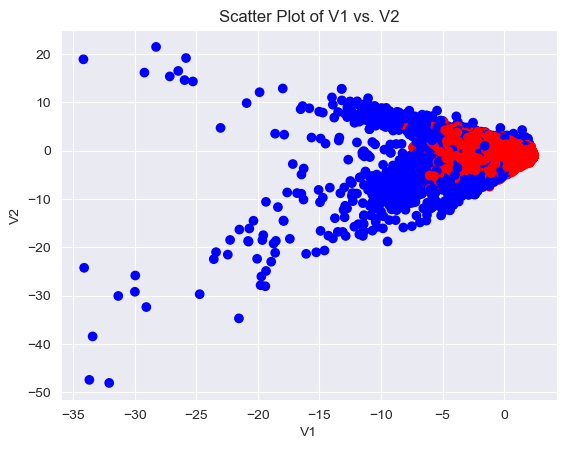

In [11]:
# Vamos a crear un gráfico de dispersión de dos características. Una de ellas es V1 y la otra es V2.
# V1 son las transacciones fraudulentas y V2 son las transacciones no fraudulentas.

plt.scatter(X_test['V1'], X_test['V2'], c=['blue' if x else 'red' for x in mask])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Scatter Plot of V1 vs. V2')
plt.show()

In [12]:
# Evaluación del modelo

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

print("Accuracy Score: ", accuracy_score(y_test, mask))
print("Recall Score: ", recall_score(y_test, mask))
print("ROC AUC Score: ", roc_auc_score(y_test, mask))

Accuracy Score:  0.9622204276535234
Recall Score:  0.826530612244898
ROC AUC Score:  0.8944924445580145
